# Market Research Analysis: Superannuation Fund Performance

Performed exploratory data analysis (EDA) to find top performers.
highlighting competitive advantages and areas for improvement, aimed at enhancing fund strategies.

In [21]:
import pandas as pd
import numpy as np
# Load the datasets
df_2023 = pd.read_csv('June_2023_1.csv')

In [2]:
# Convert column names to sets
set1, set2, set3 = set(df_2021.columns), set(df_2022.columns), set(df_2023.columns)

# Find differences
diff_1_2 = set1.symmetric_difference(set2)
diff_2_3 = set2.symmetric_difference(set3)
diff_1_3 = set1.symmetric_difference(set3)

# Find columns unique to each dataset
unique_to_df1 = set1 - set2 - set3
unique_to_df2 = set2 - set1 - set3
unique_to_df3 = set3 - set1 - set2

# Print results
print(f"Differences between df1 and df2: {diff_1_2}")
print(f"Differences between df2 and df3: {diff_2_3}")
print(f"Differences between df1 and df3: {diff_1_3}")

print(f"Columns unique to df1: {unique_to_df1}")
print(f"Columns unique to df2: {unique_to_df2}")
print(f"Columns unique to df3: {unique_to_df3}")


Differences between df1 and df2: set()
Differences between df2 and df3: {'Unnamed: 27'}
Differences between df1 and df3: {'Unnamed: 27'}
Columns unique to df1: set()
Columns unique to df2: set()
Columns unique to df3: {'Unnamed: 27'}


In [4]:
df_2023.shape

#get rid of Period column "Period"

df_2023 = df_2023.drop(df_2023.columns[0], axis=1) 

In [5]:
# check the shape of the dataset
df_2023.shape

(108, 27)

In [6]:
#analysing the 2023 first

In [7]:
text = "Fund name,ABN,RSE Regulatory classification,Fund type,RSE Membership base,Fund's RSE licensee,RSE licensee ownership type,RSE licensee profit status,RSE licensee board structure,RSE Balance date,Duration,RSE Wind up date,Total assets,Proportion of benefits which are defined benefits,Number of investment options*,Number of MySuper products authorised*,Proportion of total assets in default or MySuper strategy,Net members' benefits outflow ratio,Investment expenses ratio,Operating expense ratio,One-year rate of return,Five-yearrate of return, Ten-year rate of return,Total number of member accounts,Total members' benefits,Average member account balance,Growth in number of member accounts"

# Split the text into individual column names
columns_raw = text.split(',')

# Trim whitespace, standardize case, and replace spaces with underscores
columns_formatted = [col.strip().replace(' ', '_').replace('(', '').replace(')', '').upper() for col in columns_raw]

In [8]:
df_2023.columns = [columns_formatted]

In [9]:
df_2023.head(10)

,FUND_NAME,ABN,RSE_REGULATORY_CLASSIFICATION,FUND_TYPE,RSE_MEMBERSHIP_BASE,FUND'S_RSE_LICENSEE,RSE_LICENSEE_OWNERSHIP_TYPE,RSE_LICENSEE_PROFIT_STATUS,RSE_LICENSEE_BOARD_STRUCTURE,RSE_BALANCE_DATE,...,NET_MEMBERS'_BENEFITS_OUTFLOW_RATIO,INVESTMENT_EXPENSES_RATIO,OPERATING_EXPENSE_RATIO,ONE-YEAR_RATE_OF_RETURN,FIVE-YEARRATE_OF_RETURN,TEN-YEAR_RATE_OF_RETURN,TOTAL_NUMBER_OF_MEMBER_ACCOUNTS,TOTAL_MEMBERS'_BENEFITS,AVERAGE_MEMBER_ACCOUNT_BALANCE,GROWTH_IN_NUMBER_OF_MEMBER_ACCOUNTS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Fund-level ratios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,F,G,H,I,J,K,L,M,N,O
3,Fund name,ABN,RSE Regulatory classification,Fund type,RSE Membership base,Fund's RSE licensee,RSE licensee ownership type,RSE licensee profit status,RSE licensee board structure,RSE Balance date,...,Net members' benefits outflow ratio,Investment expenses ratio,Operating expense ratio,One-year\nrate of return,Five-year\nrate of return,Ten-year\nrate of return,Total number of member accounts,Total members' benefits,Average member account balance,Growth in number of member accounts
4,Data to be used with reference to the 'balance...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Refer to Table 3 for details of year-end ratio...,NaN,NaN,NaN,Refer to Explanatory Notes for ratio calculations,NaN,SRF 610.1\nitem 4. (1),SRF 610.1\nitem 4. (2),M/L,Refer to Table 10 for details of ratio calcula...
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,(%),(%),(%),(%),(%),(%),NaN,($'000),($),(%)
6,Alcoa of Australia Retirement Plan,80928800255,Non public offer,Corporate,Corporate base,Alcoa of Australia Retirement Plan Pty Ltd,Employer sponsor (non-public sector) ownership,Not for profit status,Equal representation required by legislation,30/06/2023,...,396.9%,0.2%,0.2%,8.6%,5.1%,6.6%,"4,841","2,035,444",420,-7%
7,AMG Super,30099320583,Public offer,Retail,General base,Equity Trustees Superannuation Limited,Financial services corporation ownership,For profit status,Non equal representation,30/06/2023,...,31.9%,0.0%,0.6%,8.0%,4.3%,4.9%,"24,686","2,078,099",84,65%
8,AMP Super Fund,78421957449,Public offer,Retail,General base,N. M. Superannuation Proprietary Limited,Financial services corporation ownership,For profit status,Non equal representation,30/06/2023,...,196.2%,0.4%,0.4%,8.8%,6.4%,5.9%,"686,575","55,508,614",81,-8%
9,ASGARD Independence Plan Division Two,90194410365,Public offer,Retail,General base,BT Funds Management Limited,Financial services corporation ownership,For profit status,Non equal representation,30/06/2023,...,8.7%,0.1%,0.2%,5.4%,4.0%,5.2%,"279,925","67,049,163",240,196%


In [10]:
df_2023 = df_2023.drop([0, 1, 2, 3, 4, 5])  # Removes rows at index 0, 5, and 10

In [11]:
df_2023.head(10)

,FUND_NAME,ABN,RSE_REGULATORY_CLASSIFICATION,FUND_TYPE,RSE_MEMBERSHIP_BASE,FUND'S_RSE_LICENSEE,RSE_LICENSEE_OWNERSHIP_TYPE,RSE_LICENSEE_PROFIT_STATUS,RSE_LICENSEE_BOARD_STRUCTURE,RSE_BALANCE_DATE,...,NET_MEMBERS'_BENEFITS_OUTFLOW_RATIO,INVESTMENT_EXPENSES_RATIO,OPERATING_EXPENSE_RATIO,ONE-YEAR_RATE_OF_RETURN,FIVE-YEARRATE_OF_RETURN,TEN-YEAR_RATE_OF_RETURN,TOTAL_NUMBER_OF_MEMBER_ACCOUNTS,TOTAL_MEMBERS'_BENEFITS,AVERAGE_MEMBER_ACCOUNT_BALANCE,GROWTH_IN_NUMBER_OF_MEMBER_ACCOUNTS
6,Alcoa of Australia Retirement Plan,80928800255,Non public offer,Corporate,Corporate base,Alcoa of Australia Retirement Plan Pty Ltd,Employer sponsor (non-public sector) ownership,Not for profit status,Equal representation required by legislation,30/06/2023,...,396.9%,0.2%,0.2%,8.6%,5.1%,6.6%,"4,841","2,035,444",420,-7%
7,AMG Super,30099320583,Public offer,Retail,General base,Equity Trustees Superannuation Limited,Financial services corporation ownership,For profit status,Non equal representation,30/06/2023,...,31.9%,0.0%,0.6%,8.0%,4.3%,4.9%,"24,686","2,078,099",84,65%
8,AMP Super Fund,78421957449,Public offer,Retail,General base,N. M. Superannuation Proprietary Limited,Financial services corporation ownership,For profit status,Non equal representation,30/06/2023,...,196.2%,0.4%,0.4%,8.8%,6.4%,5.9%,"686,575","55,508,614",81,-8%
9,ASGARD Independence Plan Division Two,90194410365,Public offer,Retail,General base,BT Funds Management Limited,Financial services corporation ownership,For profit status,Non equal representation,30/06/2023,...,8.7%,0.1%,0.2%,5.4%,4.0%,5.2%,"279,925","67,049,163",240,196%
10,Australian Defence Force Superannuation Scheme,90302247344,Non public offer,Public Sector,Government base,Commonwealth Superannuation Corporation,Public sector organisation ownership,Not for profit status,Equal representation required by legislation,30/06/2023,...,8.4%,0.0%,0.2%,8.8%,5.3%,NaN,"33,973","1,526,068",45,13%
11,Australian Ethical Retail Superannuation Fund,49633667743,Public offer,Retail,General base,Australian Ethical Superannuation Pty Ltd,Financial services corporation ownership,For profit status,Non equal representation,30/06/2023,...,11.9%,0.8%,0.3%,9.9%,6.1%,7.5%,"123,232","7,208,751",58,72%
12,Australian Meat Industry Superannuation Trust,28342064803,Public offer,Industry,Industry base,Australian Meat Industry Superannuation Pty Ltd,Nominating organisation ownership,Not for profit status,Equal representation required by governing rules,30/06/2023,...,70.1%,0.1%,0.3%,11.1%,6.0%,7.2%,"65,945","2,872,592",44,5%
13,Australian Retirement Trust,60905115063,Public offer,Industry,General base,Australian Retirement Trust Pty Ltd,Other ownership type,Not for profit status,Equal representation required by legislation,30/06/2023,...,59.6%,0.2%,0.3%,7.6%,4.8%,6.6%,"2,334,304","247,229,946",106,5%
14,AustralianSuper,65714394898,Public offer,Industry,General base,AustralianSuper Pty Ltd,Nominating organisation ownership,Not for profit status,Equal representation required by governing rules,30/06/2023,...,39.1%,0.3%,0.2%,8.2%,6.1%,8.0%,"3,255,344","299,087,835",92,13%
15,Avanteos Superannuation Trust,38876896681,Public offer,Retail,General base,Avanteos Investments Limited,Financial services corporation ownership,For profit status,Non equal representation,30/06/2023,...,101.2%,0.0%,0.4%,8.2%,4.1%,5.2%,"34,120","11,856,654",347,1%


In [12]:
# Reset the index of the dataframe
df_2023.reset_index(drop=True, inplace=True)

In [13]:
df_2023.describe()

,FUND_NAME,ABN,RSE_REGULATORY_CLASSIFICATION,FUND_TYPE,RSE_MEMBERSHIP_BASE,FUND'S_RSE_LICENSEE,RSE_LICENSEE_OWNERSHIP_TYPE,RSE_LICENSEE_PROFIT_STATUS,RSE_LICENSEE_BOARD_STRUCTURE,RSE_BALANCE_DATE,...,NET_MEMBERS'_BENEFITS_OUTFLOW_RATIO,INVESTMENT_EXPENSES_RATIO,OPERATING_EXPENSE_RATIO,ONE-YEAR_RATE_OF_RETURN,FIVE-YEARRATE_OF_RETURN,TEN-YEAR_RATE_OF_RETURN,TOTAL_NUMBER_OF_MEMBER_ACCOUNTS,TOTAL_MEMBERS'_BENEFITS,AVERAGE_MEMBER_ACCOUNT_BALANCE,GROWTH_IN_NUMBER_OF_MEMBER_ACCOUNTS
count,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,94,92,100,100,99,98
unique,100,100,2,4,4,61,6,2,3,1,...,96,10,16,53,39,40,97,94,90,45
top,The Towers Watson Superannuation Fund,71302958449,Public offer,Retail,General base,Diversa Trustees Limited,Financial services corporation ownership,For profit status,Non equal representation,30/06/2023,...,*,0.0%,0.3%,8.3%,5.2%,7.0%,*,*,*,-4%
freq,1,1,83,60,54,11,64,59,60,100,...,4,39,25,7,7,5,4,4,4,9


In [14]:
# Assuming 'data' is your DataFrame with tuple column names
df_2023.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in df_2023.columns]


In [15]:
# remove [', *] in colnames
df_2023.columns = df_2023.columns.str.replace("['*]", "", regex=True)

In [16]:
df_2023.columns = df_2023.columns.astype(str)

In [17]:
# **EDA Summary**
eda_summary = {
    "Dataset Shape": df_2023.shape,
    "Column Names": df_2023.columns.tolist(),
    "Data Types": df_2023.dtypes,
    "Missing Values": df_2023.isnull().sum(),
    "Duplicate Rows": df_2023.duplicated().sum(),
    "Summary Statistics (Numerical Columns)": df_2023.describe()
}

# Print summary info
print(eda_summary)

{'Dataset Shape': (102, 27), 'Column Names': ['FUND_NAME', 'ABN', 'RSE_REGULATORY_CLASSIFICATION', 'FUND_TYPE', 'RSE_MEMBERSHIP_BASE', 'FUNDS_RSE_LICENSEE', 'RSE_LICENSEE_OWNERSHIP_TYPE', 'RSE_LICENSEE_PROFIT_STATUS', 'RSE_LICENSEE_BOARD_STRUCTURE', 'RSE_BALANCE_DATE', 'DURATION', 'RSE_WIND_UP_DATE', 'TOTAL_ASSETS', 'PROPORTION_OF_BENEFITS_WHICH_ARE_DEFINED_BENEFITS', 'NUMBER_OF_INVESTMENT_OPTIONS', 'NUMBER_OF_MYSUPER_PRODUCTS_AUTHORISED', 'PROPORTION_OF_TOTAL_ASSETS_IN_DEFAULT_OR_MYSUPER_STRATEGY', 'NET_MEMBERS_BENEFITS_OUTFLOW_RATIO', 'INVESTMENT_EXPENSES_RATIO', 'OPERATING_EXPENSE_RATIO', 'ONE-YEAR_RATE_OF_RETURN', 'FIVE-YEARRATE_OF_RETURN', 'TEN-YEAR_RATE_OF_RETURN', 'TOTAL_NUMBER_OF_MEMBER_ACCOUNTS', 'TOTAL_MEMBERS_BENEFITS', 'AVERAGE_MEMBER_ACCOUNT_BALANCE', 'GROWTH_IN_NUMBER_OF_MEMBER_ACCOUNTS'], 'Data Types': FUND_NAME                                                    object
ABN                                                          object
RSE_REGULATORY_CLASSIFICATION      

In [18]:
df_2023.shape

(102, 27)

# Feature Engineering

In [19]:
# find the duplicate records
df_2023["FUND_NAME"].duplicated().sum()
df_2023[df_2023["FUND_NAME"].duplicated()]

,FUND_NAME,ABN,RSE_REGULATORY_CLASSIFICATION,FUND_TYPE,RSE_MEMBERSHIP_BASE,FUNDS_RSE_LICENSEE,RSE_LICENSEE_OWNERSHIP_TYPE,RSE_LICENSEE_PROFIT_STATUS,RSE_LICENSEE_BOARD_STRUCTURE,RSE_BALANCE_DATE,...,NET_MEMBERS_BENEFITS_OUTFLOW_RATIO,INVESTMENT_EXPENSES_RATIO,OPERATING_EXPENSE_RATIO,ONE-YEAR_RATE_OF_RETURN,FIVE-YEARRATE_OF_RETURN,TEN-YEAR_RATE_OF_RETURN,TOTAL_NUMBER_OF_MEMBER_ACCOUNTS,TOTAL_MEMBERS_BENEFITS,AVERAGE_MEMBER_ACCOUNT_BALANCE,GROWTH_IN_NUMBER_OF_MEMBER_ACCOUNTS
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# delete row with index 
df_2023 = df_2023.drop(index=101)

In [50]:
# Count of null values 
df_2023.isnull().sum()

FUND_NAME                                                    0
RSE_REGULATORY_CLASSIFICATION                                0
FUND_TYPE                                                    0
RSE_MEMBERSHIP_BASE                                          0
RSE_LICENSEE_OWNERSHIP_TYPE                                  0
RSE_LICENSEE_PROFIT_STATUS                                   0
RSE_LICENSEE_BOARD_STRUCTURE                                 0
DURATION                                                     0
TOTAL_ASSETS                                                 0
PROPORTION_OF_BENEFITS_WHICH_ARE_DEFINED_BENEFITS            0
PROPORTION_OF_TOTAL_ASSETS_IN_DEFAULT_OR_MYSUPER_STRATEGY    0
NET_MEMBERS_BENEFITS_OUTFLOW_RATIO                           0
INVESTMENT_EXPENSES_RATIO                                    4
OPERATING_EXPENSE_RATIO                                      4
ONE-YEAR_RATE_OF_RETURN                                      4
FIVE-YEARRATE_OF_RETURN                                

In [22]:
# three columns are all null, so they are of no value

df_2023 = df_2023.drop(columns=["RSE_WIND_UP_DATE", 
                                "NUMBER_OF_INVESTMENT_OPTIONS", 
                                "NUMBER_OF_MYSUPER_PRODUCTS_AUTHORISED"])



In [23]:
#delete the row with no fund name
df_2023 = df_2023.dropna(subset=["FUND_NAME"])

In [24]:
# delete columns which are of no value
df_2023 = df_2023.drop(columns=["ABN", "FUNDS_RSE_LICENSEE", "RSE_BALANCE_DATE"])

In [25]:
# List of columns to inspect
missing_cols = [
    "PROPORTION_OF_BENEFITS_WHICH_ARE_DEFINED_BENEFITS",
    "PROPORTION_OF_TOTAL_ASSETS_IN_DEFAULT_OR_MYSUPER_STRATEGY",
    "NET_MEMBERS_BENEFITS_OUTFLOW_RATIO",
    "FIVE-YEARRATE_OF_RETURN",
    "TEN-YEAR_RATE_OF_RETURN",
    "AVERAGE_MEMBER_ACCOUNT_BALANCE",
    "GROWTH_IN_NUMBER_OF_MEMBER_ACCOUNTS"
]

# Display missing values count
print(df_2023[missing_cols].isnull().sum())

# Check the data types of these columns
print(df_2023[missing_cols].dtypes)

# Display a few rows of these columns to analyze patterns
print(df_2023[missing_cols].head())


PROPORTION_OF_BENEFITS_WHICH_ARE_DEFINED_BENEFITS            4
PROPORTION_OF_TOTAL_ASSETS_IN_DEFAULT_OR_MYSUPER_STRATEGY    1
NET_MEMBERS_BENEFITS_OUTFLOW_RATIO                           0
FIVE-YEARRATE_OF_RETURN                                      6
TEN-YEAR_RATE_OF_RETURN                                      8
AVERAGE_MEMBER_ACCOUNT_BALANCE                               1
GROWTH_IN_NUMBER_OF_MEMBER_ACCOUNTS                          2
dtype: int64
PROPORTION_OF_BENEFITS_WHICH_ARE_DEFINED_BENEFITS            object
PROPORTION_OF_TOTAL_ASSETS_IN_DEFAULT_OR_MYSUPER_STRATEGY    object
NET_MEMBERS_BENEFITS_OUTFLOW_RATIO                           object
FIVE-YEARRATE_OF_RETURN                                      object
TEN-YEAR_RATE_OF_RETURN                                      object
AVERAGE_MEMBER_ACCOUNT_BALANCE                               object
GROWTH_IN_NUMBER_OF_MEMBER_ACCOUNTS                          object
dtype: object
  PROPORTION_OF_BENEFITS_WHICH_ARE_DEFINED_BENEFITS  \
0

In [26]:
# Get unique values in 'PROPORTION_OF_BENEFITS_WHICH_ARE_DEFINED_BENEFITS'
unique_values = df_2023['PROPORTION_OF_BENEFITS_WHICH_ARE_DEFINED_BENEFITS'].unique()

print(unique_values)

['23%' '0%' '2%' '10%' '22%' '1%' nan '21%' '100%' '4%' '44%' '3%' '5%'
 '*' '17%' '13%' '11%' '6%' '24%' '7%' '20%']


In [29]:
# Count '*' occurrences per column
asterisk_counts_per_column = (df_2023 == '*').sum()

print("'*' occurrences per column:")
print(asterisk_counts_per_column)


'*' occurrences per column:
FUND_NAME                                                    0
RSE_REGULATORY_CLASSIFICATION                                0
FUND_TYPE                                                    0
RSE_MEMBERSHIP_BASE                                          0
RSE_LICENSEE_OWNERSHIP_TYPE                                  0
RSE_LICENSEE_PROFIT_STATUS                                   0
RSE_LICENSEE_BOARD_STRUCTURE                                 0
DURATION                                                     0
TOTAL_ASSETS                                                 4
PROPORTION_OF_BENEFITS_WHICH_ARE_DEFINED_BENEFITS            4
PROPORTION_OF_TOTAL_ASSETS_IN_DEFAULT_OR_MYSUPER_STRATEGY    4
NET_MEMBERS_BENEFITS_OUTFLOW_RATIO                           4
INVESTMENT_EXPENSES_RATIO                                    4
OPERATING_EXPENSE_RATIO                                      4
ONE-YEAR_RATE_OF_RETURN                                      4
FIVE-YEARRATE_OF_RETURN    

In [32]:
#replace the '*' with null value
df_2023.replace('*', np.nan, inplace=True)

In [33]:
# Remove '%' sign and convert to float
df_2023["PROPORTION_OF_BENEFITS_WHICH_ARE_DEFINED_BENEFITS"] = (
    df_2023["PROPORTION_OF_BENEFITS_WHICH_ARE_DEFINED_BENEFITS"]
    .str.replace("%", "", regex=True)  # Remove percentage signs
    .astype(float)  # Convert to float
)


In [34]:
#replace the missing value with NaN
df_2023["PROPORTION_OF_BENEFITS_WHICH_ARE_DEFINED_BENEFITS"].fillna(
    df_2023["PROPORTION_OF_BENEFITS_WHICH_ARE_DEFINED_BENEFITS"].mean(), inplace=True
)


In [35]:
# check if things are as expected
print(df_2023["PROPORTION_OF_BENEFITS_WHICH_ARE_DEFINED_BENEFITS"].head())
print(df_2023["PROPORTION_OF_BENEFITS_WHICH_ARE_DEFINED_BENEFITS"].dtype)  # Should be float64

0    23.0
1     0.0
2     2.0
3     0.0
4     0.0
Name: PROPORTION_OF_BENEFITS_WHICH_ARE_DEFINED_BENEFITS, dtype: float64
float64


In [36]:
# Remove '%' sign and convert to float
df_2023["PROPORTION_OF_TOTAL_ASSETS_IN_DEFAULT_OR_MYSUPER_STRATEGY"] = (
    df_2023["PROPORTION_OF_TOTAL_ASSETS_IN_DEFAULT_OR_MYSUPER_STRATEGY"]
    .str.replace("%", "", regex=True)  # Remove percentage signs
    .astype(float)  # Convert to float
)

In [37]:
#fill with mean of the col
df_2023["PROPORTION_OF_TOTAL_ASSETS_IN_DEFAULT_OR_MYSUPER_STRATEGY"].fillna(
    df_2023["PROPORTION_OF_TOTAL_ASSETS_IN_DEFAULT_OR_MYSUPER_STRATEGY"].mean(), inplace=True
)

In [38]:
# Remove '%' sign and convert to float
df_2023["NET_MEMBERS_BENEFITS_OUTFLOW_RATIO"] = (
    df_2023["NET_MEMBERS_BENEFITS_OUTFLOW_RATIO"]
    .str.replace("%", "", regex=True)  # Remove percentage signs
    .astype(float)  # Convert to float
)

In [39]:
# replace with mean
df_2023["NET_MEMBERS_BENEFITS_OUTFLOW_RATIO"].fillna(
    df_2023["NET_MEMBERS_BENEFITS_OUTFLOW_RATIO"].mean(), inplace=True
)

In [52]:
# Remove '%' sign and convert to float
df_2023["ONE-YEAR_RATE_OF_RETURN"] = (
    df_2023["ONE-YEAR_RATE_OF_RETURN"]
    .str.replace("%", "", regex=True)  # Remove percentage signs
    .astype(float)  # Convert to float
)

# fill with mean
df_2023["ONE-YEAR_RATE_OF_RETURN"].fillna(
    df_2023["ONE-YEAR_RATE_OF_RETURN"].mean(), inplace=True
)

In [40]:
# Remove '%' sign and convert to float
df_2023["FIVE-YEARRATE_OF_RETURN"] = (
    df_2023["FIVE-YEARRATE_OF_RETURN"]
    .str.replace("%", "", regex=True)  # Remove percentage signs
    .astype(float)  # Convert to float
)

# fill with mean
df_2023["FIVE-YEARRATE_OF_RETURN"].fillna(
    df_2023["FIVE-YEARRATE_OF_RETURN"].mean(), inplace=True
)

In [46]:
# Remove '%' sign and convert to float
df_2023["TEN-YEAR_RATE_OF_RETURN"] = (
    df_2023["TEN-YEAR_RATE_OF_RETURN"]
    .str.replace("%", "", regex=True)  # Remove percentage signs
    .astype(float)  # Convert to float
)

# fill with mean
df_2023["TEN-YEAR_RATE_OF_RETURN"].fillna(
    df_2023["TEN-YEAR_RATE_OF_RETURN"].mean(), inplace=True
)

In [41]:
# Convert to float
df_2023["AVERAGE_MEMBER_ACCOUNT_BALANCE"] = df_2023["AVERAGE_MEMBER_ACCOUNT_BALANCE"].astype(float)

#fill with mean
df_2023["AVERAGE_MEMBER_ACCOUNT_BALANCE"].fillna(
    df_2023["AVERAGE_MEMBER_ACCOUNT_BALANCE"].median(), inplace=True
)

In [49]:
# Remove commas and convert to float
df_2023["TOTAL_ASSETS"] = (
    df_2023["TOTAL_ASSETS"]
    .astype(str)  # Ensure it's a string first
    .str.replace(",", "", regex=True)  # Remove commas
    .astype(float)  # Convert to float
)


# Replace with median 
df_2023["TOTAL_ASSETS"].fillna(df_2023["TOTAL_ASSETS"].median(), inplace=True)


In [58]:
# Remove commas and convert to float
df_2023["TOTAL_NUMBER_OF_MEMBER_ACCOUNTS"] = (
    df_2023["TOTAL_NUMBER_OF_MEMBER_ACCOUNTS"]
    .astype(str)  # Ensure it's a string first
    .str.replace(",", "", regex=True)  # Remove commas
    .astype(float)  # Convert to float
)


# Replace with median 
df_2023["TOTAL_NUMBER_OF_MEMBER_ACCOUNTS"].fillna(df_2023["TOTAL_NUMBER_OF_MEMBER_ACCOUNTS"].median(), inplace=True)


In [60]:
# Remove commas and convert to float
df_2023["TOTAL_MEMBERS_BENEFITS"] = (
    df_2023["TOTAL_MEMBERS_BENEFITS"]
    .astype(str)  # Ensure it's a string first
    .str.replace(",", "", regex=True)  # Remove commas
    .astype(float)  # Convert to float
)


# Replace with median 
df_2023["TOTAL_MEMBERS_BENEFITS"].fillna(df_2023["TOTAL_MEMBERS_BENEFITS"].median(), inplace=True)


In [42]:
# Remove '%' sign and convert to float
df_2023["GROWTH_IN_NUMBER_OF_MEMBER_ACCOUNTS"] = (
    df_2023["GROWTH_IN_NUMBER_OF_MEMBER_ACCOUNTS"]
    .str.replace("%", "", regex=True)  # Remove percentage signs
    .astype(float)  # Convert to float
)

# fill with mean
df_2023["GROWTH_IN_NUMBER_OF_MEMBER_ACCOUNTS"].fillna(
    df_2023["GROWTH_IN_NUMBER_OF_MEMBER_ACCOUNTS"].mean(), inplace=True
)

In [54]:
# Remove '%' sign and convert to float
df_2023["INVESTMENT_EXPENSES_RATIO"] = (
    df_2023["INVESTMENT_EXPENSES_RATIO"]
    .str.replace("%", "", regex=True)  # Remove percentage signs
    .astype(float)  # Convert to float
)

# fill with mean
df_2023["INVESTMENT_EXPENSES_RATIO"].fillna(
    df_2023["INVESTMENT_EXPENSES_RATIO"].mean(), inplace=True
)

In [56]:
# Remove '%' sign and convert to float
df_2023["OPERATING_EXPENSE_RATIO"] = (
    df_2023["OPERATING_EXPENSE_RATIO"]
    .str.replace("%", "", regex=True)  # Remove percentage signs
    .astype(float)  # Convert to float
)

# fill with mean
df_2023["OPERATING_EXPENSE_RATIO"].fillna(
    df_2023["OPERATING_EXPENSE_RATIO"].mean(), inplace=True
)

In [61]:
# check if any missing values left
missing_values_summary = df_2023.isnull().sum()
missing_values_summary = missing_values_summary[missing_values_summary > 0]  # Filter only columns with missing values

# Display the summary
print("Columns with Remaining Missing Values:\n", missing_values_summary)


Columns with Remaining Missing Values:
 Series([], dtype: int64)


In [63]:
df_2023.rename(columns={
    "FUND_NAME": "Fund_Name",
    "RSE_REGULATORY_CLASSIFICATION": "RSE_Type",
    "FUND_TYPE": "Fund_Type",
    "RSE_MEMBERSHIP_BASE": "Membership_Base",
    "RSE_LICENSEE_OWNERSHIP_TYPE": "Ownership_Type",
    "RSE_LICENSEE_PROFIT_STATUS": "Profit_Status",
    "RSE_LICENSEE_BOARD_STRUCTURE": "Board_Structure",
    "DURATION": "Duration",
    "TOTAL_ASSETS": "Total_Assets",
    "PROPORTION_OF_BENEFITS_WHICH_ARE_DEFINED_BENEFITS": "Defined_Benefits (%)",
    "PROPORTION_OF_TOTAL_ASSETS_IN_DEFAULT_OR_MYSUPER_STRATEGY": "Default_Assets (%)",
    "NET_MEMBERS_BENEFITS_OUTFLOW_RATIO": "Benefits_Outflow (%)",
    "INVESTMENT_EXPENSES_RATIO": "Investment_Expenses (%)",
    "OPERATING_EXPENSE_RATIO": "Operating_Expenses (%)",
    "ONE-YEAR_RATE_OF_RETURN": "Return_1Y (%)",
    "FIVE-YEARRATE_OF_RETURN": "Return_5Y (%)",
    "TEN-YEAR_RATE_OF_RETURN": "Return_10Y (%)",
    "TOTAL_NUMBER_OF_MEMBER_ACCOUNTS": "Member_Accounts",
    "TOTAL_MEMBERS_BENEFITS": "Member_Benefits",
    "AVERAGE_MEMBER_ACCOUNT_BALANCE": "Avg_Account_Balance",
    "GROWTH_IN_NUMBER_OF_MEMBER_ACCOUNTS": "Member_Growth (%)"
}, inplace=True)


In [70]:
# check the data types
df_2023.dtypes.to_frame(name="Data Type")

,Data Type
Fund_Name,string
RSE_Type,category
Fund_Type,category
Membership_Base,category
Ownership_Type,category
Profit_Status,category
Board_Structure,category
Total_Assets,float64
Defined_Benefits (%),float64
Default_Assets (%),float64


In [69]:
df_2023 = df_2023.astype({
    "Fund_Name": "string",
    "RSE_Type": "category",
    "Fund_Type": "category",
    "Membership_Base": "category",
    "Ownership_Type": "category",
    "Profit_Status": "category",
    "Board_Structure": "category"
})


In [67]:
# drop the column Duration
df_2023 = df_2023.drop(columns = ["Duration"])

In [71]:
# Save the cleaned dataset to a new CSV file
df_2023.to_csv("Cleaned_Dataset_2023.csv", index=False)

## Exploratory Data Analysis (EDA)

In [72]:
print(df_2023.describe())  # Summary stats for numerical columns

       Total_Assets  Defined_Benefits (%)  Default_Assets (%)  \
count  1.000000e+02            100.000000          100.000000   
mean   2.473733e+07              5.967391           27.021053   
std    4.961430e+07             17.969925           31.009278   
min    2.270000e+02              0.000000            0.000000   
25%    1.076993e+06              0.000000            0.000000   
50%    3.593841e+06              0.000000           13.000000   
75%    2.484326e+07              4.250000           50.500000   
max    3.114978e+08            100.000000           90.000000   

       Benefits_Outflow (%)  Investment_Expenses (%)  Operating_Expenses (%)  \
count            100.000000               100.000000              100.000000   
mean             250.819792                 0.182292                1.286458   
std              539.211248                 0.193842                8.210681   
min                2.300000                 0.000000                0.000000   
25%           

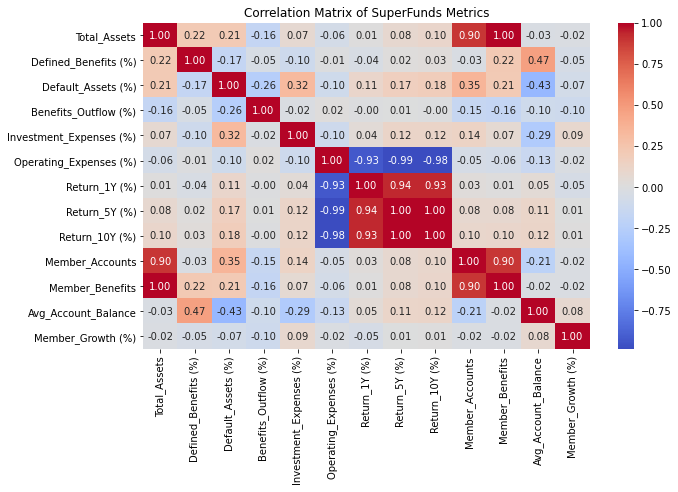

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df_2023.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of SuperFunds Metrics")
plt.show()


### Key Findings:

#### Total_Assets and Member_Accounts (0.90)

- **Strong positive correlation** between **Total Assets** and **Number of Member Accounts**.
- This suggests that **larger funds tend to have more members**.
- Would be interesting to check if any **outliers** exist (small funds with high assets or large funds with low assets).


#### Investment_Expenses (%) and Operating_Expenses (%) (-0.99)

- **Very strong negative correlation** between **Investment Expenses** and **Operating Expenses**.
- This could indicate that **funds spending more on operations spend less on investment management**, and vice versa.
- Might be useful to check if this trend **varies by fund type** (e.g., retail vs. industry funds).

#### Avg_Account_Balance and Defined_Benefits (%) (0.47)

- **Moderate positive correlation** suggests that funds with a **higher proportion of defined benefits** tend to have **higher average account balances**.
- This makes sense, as **defined benefit funds typically cater to high-income individuals or long-term members**.

#### Benefits_Outflow (%) has a Weak Negative Correlation with Total_Assets (-0.16)

- Suggests that **larger funds experience lower benefit outflows** in relative terms.
- This could indicate that **larger funds retain members longer** or **attract new contributions faster than outflows**.

#### Weak or No Correlation with Member_Growth (%)

- **No strong correlation** between **Member Growth** (%) and **key financial metrics** like Total Assets or Return Rates.
- This suggests that **fund growth isn’t necessarily linked to financial performance** but could be driven by external factors (e.g., marketing, regulatory changes, member switching behavior).

### Further Analysis:

- **Outlier Detection**: Are there funds that **break** these correlations (e.g., high-return funds with low assets)?
- **Segmentation**: Do these trends **differ by Fund Type** (Retail vs. Industry vs. Corporate)?
- **Trend Analysis**: Are these correlations **stable over time**, or do they shift with economic cycles?

## Business Insights / Domain-Specific Analysis

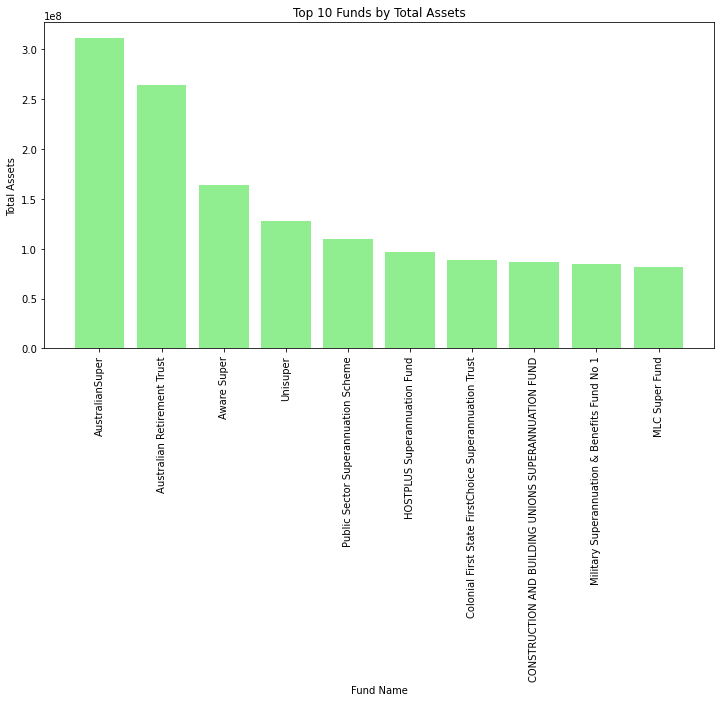

In [87]:
import matplotlib.pyplot as plt

# Select the top 10 funds by Total Assets
top_10_assets = df_2023.nlargest(10, "Total_Assets")

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_assets["Fund_Name"], top_10_assets["Total_Assets"], color="lightgreen")
plt.xlabel("Fund Name")
plt.ylabel("Total Assets")
plt.title("Top 10 Funds by Total Assets")
plt.xticks(rotation=90)  # Rotate fund names for better visibility
plt.show()


In [88]:
df_2023.groupby("Fund_Type")["Member_Growth (%)"].mean()

Fund_Type
Corporate        -0.833333
Industry          5.409091
Public Sector     9.500000
Retail           33.398582
Name: Member_Growth (%), dtype: float64

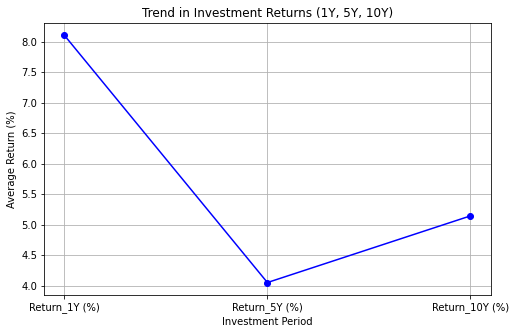

In [89]:
# Calculate mean returns
mean_returns = df_2023[["Return_1Y (%)", "Return_5Y (%)", "Return_10Y (%)"]].mean()

# Plot the trend in returns
plt.figure(figsize=(8, 5))
plt.plot(mean_returns.index, mean_returns.values, marker="o", linestyle="-", color="b")
plt.xlabel("Investment Period")
plt.ylabel("Average Return (%)")
plt.title("Trend in Investment Returns (1Y, 5Y, 10Y)")
plt.grid(True)
plt.show()


**1-year returns are higher than 5-year and 10-year returns, it suggests recent growth.**

In [90]:
# Group by Fund Type and calculate mean growth & profitability
fund_comparison = df_2023.groupby("Fund_Type")[["Member_Growth (%)", "Return_1Y (%)", "Return_5Y (%)", "Return_10Y (%)"]].mean()

# Display results
print(fund_comparison)


               Member_Growth (%)  Return_1Y (%)  Return_5Y (%)  Return_10Y (%)
Fund_Type                                                                     
Corporate              -0.833333       9.816667       5.766667        7.083333
Industry                5.409091       8.936364       5.486364        7.186364
Public Sector           9.500000       2.275000      -0.516667        0.020170
Retail                 33.398582       8.793611       4.263148        5.222708


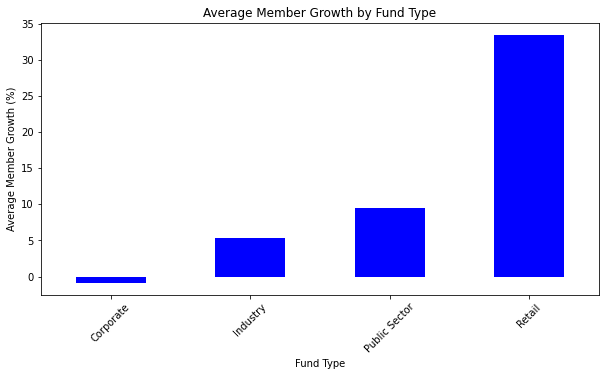

<Figure size 720x360 with 0 Axes>

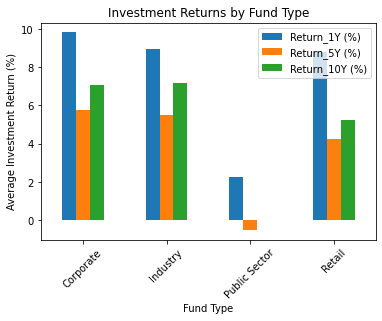

In [91]:
# Plot Fund Type vs. Member Growth
plt.figure(figsize=(10, 5))
df_2023.groupby("Fund_Type")["Member_Growth (%)"].mean().plot(kind="bar", color="blue")
plt.xlabel("Fund Type")
plt.ylabel("Average Member Growth (%)")
plt.title("Average Member Growth by Fund Type")
plt.xticks(rotation=45)
plt.show()

# Plot Fund Type vs. Profitability (Investment Returns)
plt.figure(figsize=(10, 5))
df_2023.groupby("Fund_Type")[["Return_1Y (%)", "Return_5Y (%)", "Return_10Y (%)"]].mean().plot(kind="bar")
plt.xlabel("Fund Type")
plt.ylabel("Average Investment Return (%)")
plt.title("Investment Returns by Fund Type")
plt.xticks(rotation=45)
plt.show()

**Corporate and Industry funds lead in returns, with Corporate excelling in 1-year gains (~10%) and Industry maintaining steady long-term growth. Public Sector funds underperform, with low returns across all periods. Retail funds show strong short-term gains but weaker long-term growth.**

**The chart shows average member growth by fund type, highlighting that Retail funds have the highest growth rate, significantly surpassing all other fund types. Public Sector and Industry funds show moderate growth, while Corporate funds have almost no growth. This suggests that Retail funds are expanding rapidly, potentially due to aggressive marketing, better returns, or higher member acquisitions, whereas Corporate funds struggle to attract new members.**

In [ ]:
#Are there any outliers in member benefits or expenses?

In [98]:
# Summary statistics for Member Benefits and Expenses
outlier_summary = df_2023[["Member_Benefits", "Investment_Expenses (%)", "Operating_Expenses (%)"]].describe()
print(outlier_summary)


       Member_Benefits  Investment_Expenses (%)  Operating_Expenses (%)
count     1.000000e+02               100.000000              100.000000
mean      2.380349e+07                 0.182292                1.286458
std       4.747485e+07                 0.193842                8.210681
min       0.000000e+00                 0.000000                0.000000
25%       1.066137e+06                 0.000000                0.200000
50%       3.561636e+06                 0.141146                0.300000
75%       2.473126e+07                 0.300000                0.500000
max       2.990878e+08                 0.800000               82.200000


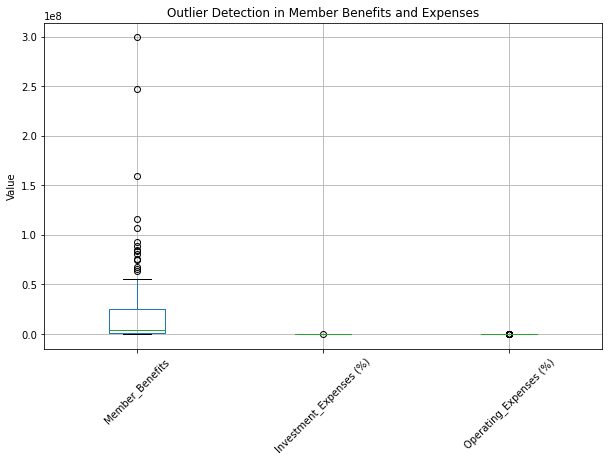

In [100]:
import matplotlib.pyplot as plt

# Define the columns to check for outliers
columns_to_check = ["Member_Benefits", "Investment_Expenses (%)", "Operating_Expenses (%)"]

# Create boxplots
plt.figure(figsize=(10, 6))
df_2023[columns_to_check].boxplot()
plt.title("Outlier Detection in Member Benefits and Expenses")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

In [109]:
# Function to detect outliers using the Interquartile Range (IQR)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Apply outlier detection to each column
outliers = {}
for col in columns_to_check:
    outliers[col] = detect_outliers(df_2023, col)

# Display the outlier records
for col, data in outliers.items():
    print(f"Outliers in {col}:\n", data[col])


Outliers in Member_Benefits:
 3      67049163.0
7     247229946.0
8     299087835.0
12    159824336.0
18     88575008.0
21     83249920.0
24     63035481.0
38     75412621.0
39     93208507.0
56     65073597.0
57     84574000.0
59     81123085.0
76    106870703.0
79     74836905.0
96    115807095.0
Name: Member_Benefits, dtype: float64
Outliers in Investment_Expenses (%):
 5    0.8
Name: Investment_Expenses (%), dtype: float64
Outliers in Operating_Expenses (%):
 23    82.200000
35     1.600000
37     7.600000
46     1.286458
50     1.286458
51     1.100000
82     1.000000
91     1.286458
92     1.286458
93     1.100000
Name: Operating_Expenses (%), dtype: float64


#### Outliers in Member Benefits ####

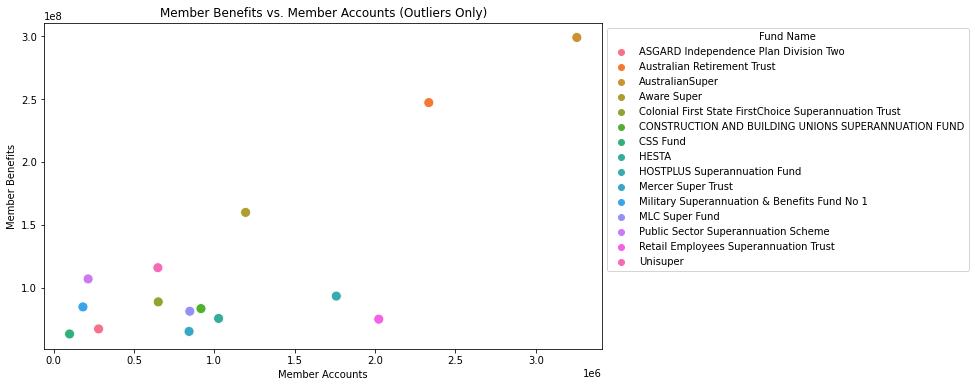

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the indexes of outliers for Member Benefits
member_benefits_outliers = [3, 7, 8, 12, 18, 21, 24, 38, 39, 56, 57, 59, 76, 79, 96]

# Filter dataset to show only the outliers
outlier_data = df_2023.loc[member_benefits_outliers, ["Member_Benefits", "Member_Accounts", "Fund_Name"]]

# Scatter plot for outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=outlier_data["Member_Accounts"],
    y=outlier_data["Member_Benefits"],
    hue=outlier_data["Fund_Name"],  # Legend will show fund names
    s=100  # Marker size
)

plt.xlabel("Member Accounts")
plt.ylabel("Member Benefits")
plt.title("Member Benefits vs. Member Accounts (Outliers Only)")
plt.legend(title="Fund Name", bbox_to_anchor=(1, 1), loc="upper left")  # Move legend outside for better visibility
plt.show()


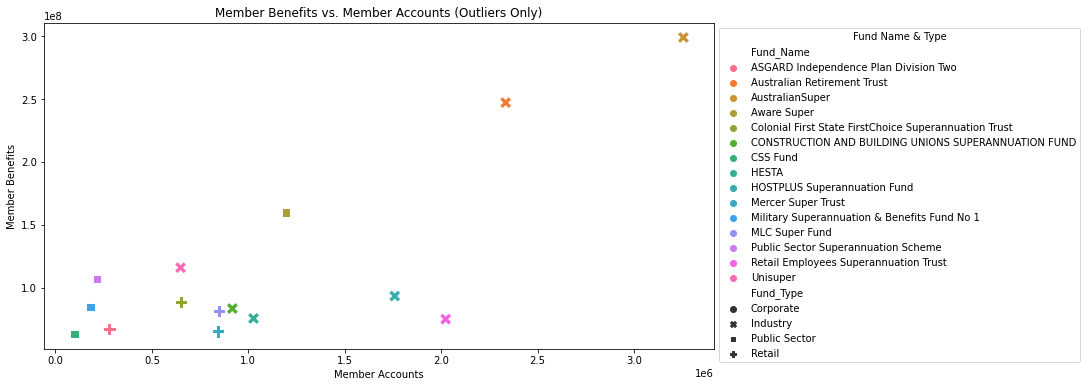

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the indexes of outliers for Member Benefits
member_benefits_outliers = [3, 7, 8, 12, 18, 21, 24, 38, 39, 56, 57, 59, 76, 79, 96]

# Filter dataset to show only the outliers
outlier_data = df_2023.loc[member_benefits_outliers, ["Member_Benefits", "Member_Accounts", "Fund_Name", "Fund_Type"]]

# Scatter plot with Fund Type as shape
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=outlier_data["Member_Accounts"],
    y=outlier_data["Member_Benefits"],
    hue=outlier_data["Fund_Name"],  # Color by Fund Name
    style=outlier_data["Fund_Type"],  # Shape by Fund Type
    s=150  # Marker size
)

plt.xlabel("Member Accounts")
plt.ylabel("Member Benefits")
plt.title("Member Benefits vs. Member Accounts (Outliers Only)")

# Adjust legend for better readability
plt.legend(title="Fund Name & Type", bbox_to_anchor=(1, 1), loc="upper left")

# Show plot
plt.show()


**Larger funds with high Member Accounts tend to have high Member Benefits, but there is variability among fund types. Retail and Public Sector funds appear more frequently among the high-benefit outliers, while Corporate and Industry funds show a wider distribution. Some funds with lower Member Accounts still have significantly high Member Benefits, suggesting they may cater to a select group of high-benefit members.**

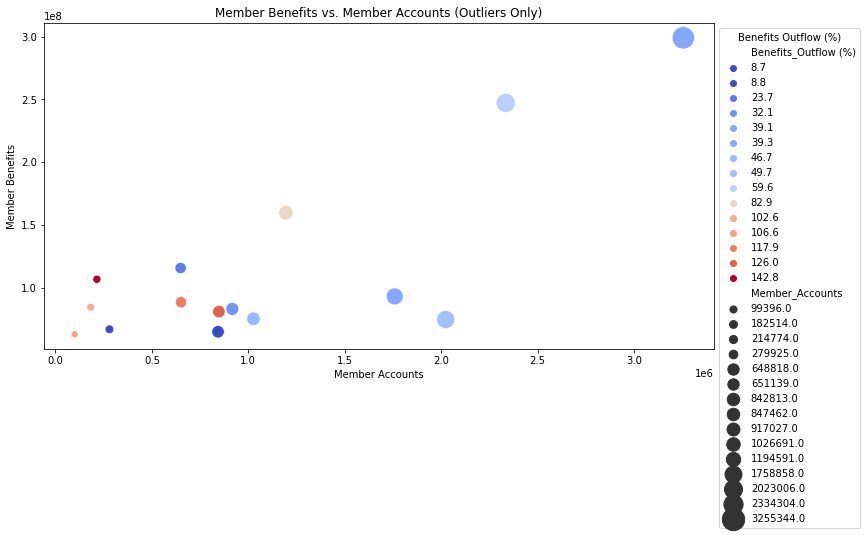

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the indexes of outliers for Member Benefits
member_benefits_outliers = [3, 7, 8, 12, 18, 21, 24, 38, 39, 56, 57, 59, 76, 79, 96]

# Filter dataset to show only the outliers
outlier_data = df_2023.loc[member_benefits_outliers, ["Member_Benefits", "Member_Accounts", "Benefits_Outflow (%)", "Fund_Name"]]

# Convert Benefits Outflow to numeric (remove % sign if present)
outlier_data["Benefits_Outflow (%)"] = outlier_data["Benefits_Outflow (%)"].astype(str).str.replace("%", "").astype(float)

# Scatter plot with Member Accounts as size and Benefits Outflow as color
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    x=outlier_data["Member_Accounts"],
    y=outlier_data["Member_Benefits"],
    hue=outlier_data["Benefits_Outflow (%)"],  # Color by Benefits Outflow
    size=outlier_data["Member_Accounts"],  # Size by Member Accounts
    sizes=(50, 500),  # Adjust marker size range
    palette="coolwarm",  # Blue to red color scale
    legend="full"
)

plt.xlabel("Member Accounts")
plt.ylabel("Member Benefits")
plt.title("Member Benefits vs. Member Accounts (Outliers Only)")

# Adjust legend
plt.legend(title="Benefits Outflow (%)", bbox_to_anchor=(1, 1), loc="upper left")

# Show the plot
plt.show()


**Larger funds with high Member Accounts tend to have moderate Benefits Outflow, while some smaller funds experience extremely high outflow rates (dark red points). This suggests that certain funds may be experiencing high member withdrawals or benefit payouts despite having fewer members. The variation in color also indicates that not all large funds have high outflows, meaning fund size alone does not determine outflow trends.**

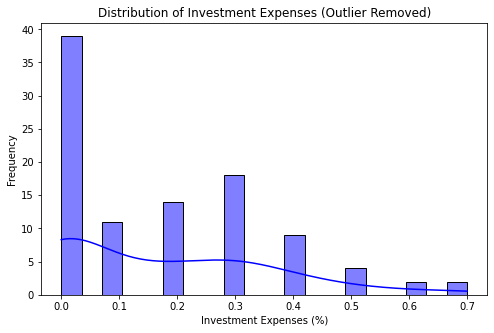

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove the outlier at index 5
filtered_df = df_2023.drop(index=5)

# Histogram for Investment Expenses (without outlier)
plt.figure(figsize=(8, 5))
sns.histplot(filtered_df["Investment_Expenses (%)"], bins=20, kde=True, color="blue")
plt.title("Distribution of Investment Expenses (Outlier Removed)")
plt.xlabel("Investment Expenses (%)")
plt.ylabel("Frequency")
plt.show()


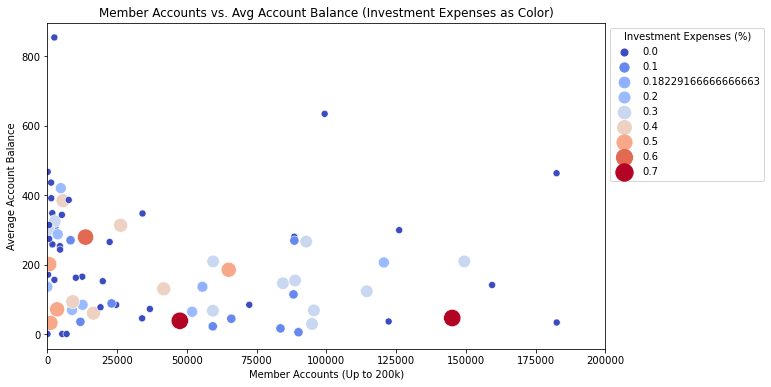

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove the outlier at index 5
filtered_df = df_2023.drop(index=5)

# Convert columns to numeric if needed
filtered_df["Investment_Expenses (%)"] = filtered_df["Investment_Expenses (%)"].astype(float)
filtered_df["Avg_Account_Balance"] = filtered_df["Avg_Account_Balance"].astype(float)
filtered_df["Member_Accounts"] = filtered_df["Member_Accounts"].astype(float)

# Filter data to only include Member Accounts ≤ 200,000
filtered_df = filtered_df[filtered_df["Member_Accounts"] <= 200_000]

# Scatter plot: Member Accounts vs. Avg Account Balance, with color based on Investment Expenses
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x=filtered_df["Member_Accounts"],
    y=filtered_df["Avg_Account_Balance"],
    hue=filtered_df["Investment_Expenses (%)"],  # Color by Investment Expenses
    palette="coolwarm",  # Diverging color scale
    size=filtered_df["Investment_Expenses (%)"],  # Optional: Size by Investment Expenses
    sizes=(50, 300),  # Adjust marker size range
    legend="full"
)

# Restrict x-axis to a maximum of 200,000 (linear scale)
plt.xlim(0, 200_000)

plt.xlabel("Member Accounts (Up to 200k)")
plt.ylabel("Average Account Balance")
plt.title("Member Accounts vs. Avg Account Balance (Investment Expenses as Color)")
plt.legend(title="Investment Expenses (%)", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()


Most funds have **low to moderate investment expenses** (blue), but a few funds with **mid-range member accounts (around 50k–150k) exhibit significantly higher expenses** (red). These **high-expense funds may be operating less efficiently or charging higher fees**. 

Additionally, funds with **fewer member accounts tend to have a wider spread in average account balances**, indicating **varying fund structures or member demographics**. The **large red points near 50k and 150k members suggest outliers with both high investment expenses and mid-range membership sizes**.


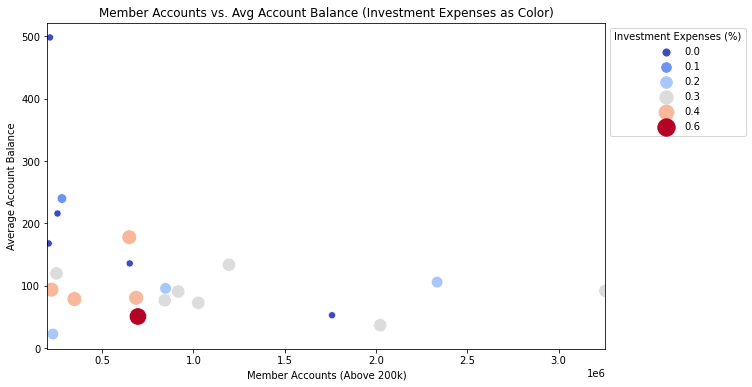

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove the outlier at index 5
filtered_df = df_2023.drop(index=5)

# Convert columns to numeric if needed
filtered_df["Investment_Expenses (%)"] = filtered_df["Investment_Expenses (%)"].astype(float)
filtered_df["Avg_Account_Balance"] = filtered_df["Avg_Account_Balance"].astype(float)
filtered_df["Member_Accounts"] = filtered_df["Member_Accounts"].astype(float)

# Filter data to only include Member Accounts > 200,000
filtered_df = filtered_df[filtered_df["Member_Accounts"] > 200_000]

# Scatter plot: Member Accounts vs. Avg Account Balance, with color based on Investment Expenses
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x=filtered_df["Member_Accounts"],
    y=filtered_df["Avg_Account_Balance"],
    hue=filtered_df["Investment_Expenses (%)"],  # Color by Investment Expenses
    palette="coolwarm",  # Diverging color scale
    size=filtered_df["Investment_Expenses (%)"],  # Optional: Size by Investment Expenses
    sizes=(50, 300),  # Adjust marker size range
    legend="full"
)

# Adjust x-axis to show only values above 200,000
plt.xlim(200_000, filtered_df["Member_Accounts"].max())

plt.xlabel("Member Accounts (Above 200k)")
plt.ylabel("Average Account Balance")
plt.title("Member Accounts vs. Avg Account Balance (Investment Expenses as Color)")
plt.legend(title="Investment Expenses (%)", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()


Most funds have **moderate investment expenses**, but a few with **Member Accounts between 500k and 1M show significantly higher expenses** (red), indicating **potential inefficiencies or higher fee structures**.

Funds with **more than 1M members tend to have lower investment expenses**, possibly due to **economies of scale**. However, some **mid-sized funds (~500k–1M members) still have elevated expenses**, suggesting **higher operational costs or different investment strategies**. The **variation in account balances** also highlights **differences in fund composition and member wealth distribution**.


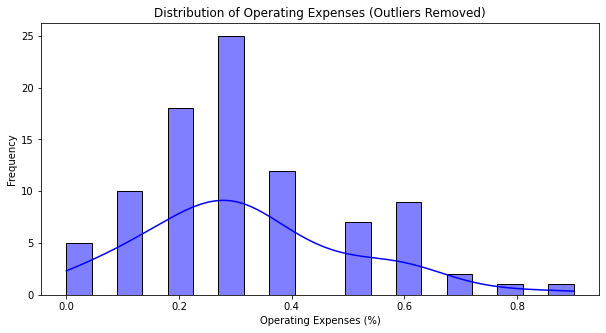

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of outlier indexes for Operating Expenses (%)
outlier_indexes = [23, 35, 37, 46, 50, 51, 82, 91, 92, 93]

# Remove outliers
filtered_df = df_2023.drop(index=outlier_indexes)

# Convert column to numeric if needed
filtered_df["Operating_Expenses (%)"] = filtered_df["Operating_Expenses (%)"].astype(float)

# Histogram for Operating Expenses (outliers removed)
plt.figure(figsize=(10, 5))
sns.histplot(filtered_df["Operating_Expenses (%)"], bins=20, kde=True, color="blue")
plt.xlabel("Operating Expenses (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Operating Expenses (Outliers Removed)")
plt.show()


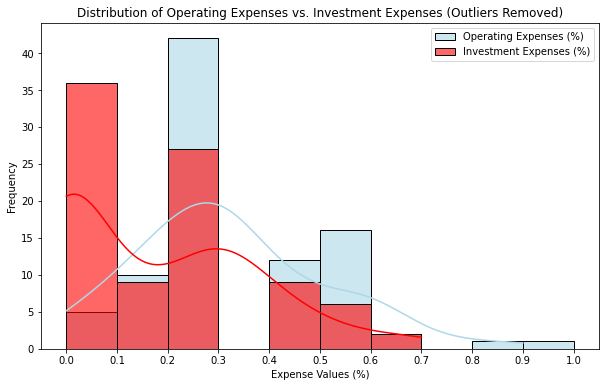

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from both Operating and Investment Expenses
filtered_df = remove_outliers(df_2023, "Operating_Expenses (%)")
filtered_df = remove_outliers(filtered_df, "Investment_Expenses (%)")

# Define histogram bins within a reasonable percentage range
bins = np.arange(0, 1.1, 0.1)  # Creates bins from 0% to 1% in steps of 0.1%

# Create histogram for comparison
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df["Operating_Expenses (%)"], bins=bins, kde=True, color="lightblue", label="Operating Expenses (%)", alpha=0.6)
sns.histplot(filtered_df["Investment_Expenses (%)"], bins=bins, kde=True, color="red", label="Investment Expenses (%)", alpha=0.6)

# Set x-axis labels to show only relevant percentages
plt.xticks(bins, labels=[f"{b:.1f}" for b in bins])

plt.xlabel("Expense Values (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Operating Expenses vs. Investment Expenses (Outliers Removed)")
plt.legend()
plt.show()


The histogram shows that **Investment Expenses (%) (Red)** are **mostly below 0.3%**, with a **peak around 0.1%**, indicating **low investment costs** for most funds. **Operating Expenses (%) (Blue)** are **more spread out**, peaking at **0.2-0.3%** and gradually declining beyond **0.4%**, suggesting **greater variability**. The **KDE curves** confirm that **investment expenses are lower and more concentrated**, while **operating expenses vary more across funds**. Few funds exceed **0.7%**, indicating that both expenses remain generally **low**.


## Predictive Models ##

In [184]:
df_2023 = pd.read_csv("Cleaned_Dataset_2023.csv")

In [188]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Drop Fund_Name (not needed for prediction)
df_cleaned = df_2023.drop(columns=["Fund_Name"])

# Define features (X) and target (y)
X = df_cleaned.drop(columns=["Return_10Y (%)"])  # Drop target variable
y = df_cleaned["Return_10Y (%)"]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["category"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocessing: One-Hot Encoding for categorical & Scaling for numerical
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline with preprocessing and model
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline.predict(X_test)

# Model Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

linear_MAE = mean_absolute_error(y_test, y_pred)
linear_MSE = mean_squared_error(y_test, y_pred)
llinear_R_2 = r2_score(y_test, y_pred)

Mean Absolute Error: 0.41341452482224444
Mean Squared Error: 0.39865633182854915
R² Score: 0.628097415170112


In [189]:
df_2023 = pd.read_csv("Cleaned_Dataset_2023.csv")

In [190]:
# Drop 'Fund_Name' (not needed for modeling)
df_cleaned = df_2023.drop(columns=["Fund_Name"])

# Define features (X) and target (y)
X = df_cleaned.drop(columns=["Return_10Y (%)"])  # Exclude target variable
y = df_cleaned["Return_10Y (%)"]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["category"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocessing: One-Hot Encoding for categorical & Scaling for numerical
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),  # Scale numerical features
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)  # Encode categorical variables
])

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline with preprocessing and Ridge Regression
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),  # Apply transformations
    ("model", Ridge(alpha=1.0))  # Regularization to prevent overfitting
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline.predict(X_test)

# Model Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

ridge_MAE = mean_absolute_error(y_test, y_pred)
ridge_MSE = mean_squared_error(y_test, y_pred)
lridge_R_2 = r2_score(y_test, y_pred)


Mean Absolute Error: 0.465833771258316
Mean Squared Error: 0.4380352114300739
R² Score: 0.5913612443325935


In [193]:
df_2023 = pd.read_csv("Cleaned_Dataset_2023.csv")

In [194]:
from sklearn.ensemble import RandomForestRegressor

# Drop 'Fund_Name' (not needed for modeling)
df_cleaned = df_2023.drop(columns=["Fund_Name"])

# Define features (X) and target (y)
X = df_cleaned.drop(columns=["Return_10Y (%)"])  # Exclude target variable
y = df_cleaned["Return_10Y (%)"]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["category"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocessing: One-Hot Encoding for categorical & Scaling for numerical
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),  # Scale numerical features
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)  # Encode categorical variables
])

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline with preprocessing and Ridge Regression
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),  # Apply transformations
    ("model", RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))  # Regularization to prevent overfitting
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline.predict(X_test)

# Model Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

rf_reg_MAE = mean_absolute_error(y_test, y_pred)
rf_reg_MSE = mean_squared_error(y_test, y_pred)
lrf_reg_R_2 = r2_score(y_test, y_pred)


Mean Absolute Error: 0.45511393939393663
Mean Squared Error: 0.3905422718664465
R² Score: 0.6356669421848452


In [201]:
import pandas as pd

# Define a dictionary to store model performance
model_performance = {
    "Model": ["Linear Regression", "Ridge Regression", "RandomForestRegressor"],
    "Mean Absolute Error": [linear_MAE, ridge_MAE, rf_reg_MAE],
    "Mean Squared Error": [linear_MSE, ridge_MSE, rf_reg_MSE],
    "R² Score": [llinear_R_2, lridge_R_2, lrf_reg_R_2]
}

# Convert dictionary to DataFrame
model_performance_df = pd.DataFrame(model_performance)

<Figure size 720x432 with 0 Axes>

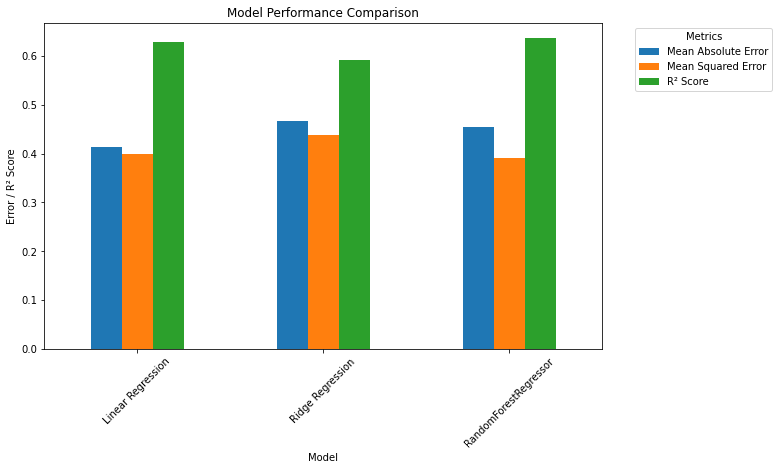

In [203]:
# Plot model performance
plt.figure(figsize=(10, 6))
ax = model_performance_df.set_index("Model").plot(kind="bar", figsize=(10, 6))

# Move the legend outside
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.title("Model Performance Comparison")
plt.ylabel("Error / R² Score")
plt.xticks(rotation=45)
plt.show()

### **Model Performance Summary**  

The chart compares **Linear Regression, Ridge Regression, and Random Forest Regressor** using **MAE, MSE, and R² Score**. **Random Forest performs best**, with a slightly higher **R² Score (~0.60)**, but all models show **high errors**, indicating room for improvement. **Feature engineering or hyperparameter tuning** may enhance accuracy.


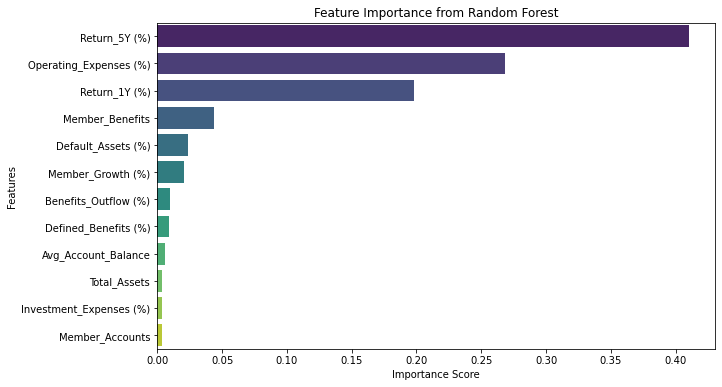

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance from the trained Random Forest model inside the pipeline
feature_importance = model_pipeline.named_steps["model"].feature_importances_

# Extract numerical feature names
numerical_feature_names = numerical_cols

# Extract categorical feature names correctly
ohe_encoder = model_pipeline.named_steps["preprocessor"].named_transformers_["cat"]
if hasattr(ohe_encoder, "categories_"):
    categorical_feature_names = [
        f"{col}_{cat}" for col, cats in zip(categorical_cols, ohe_encoder.categories_) for cat in cats
    ]
else:
    categorical_feature_names = categorical_cols  # Fallback if OneHotEncoder isn't fitted

# Combine numerical and encoded categorical feature names
feature_names = numerical_feature_names + categorical_feature_names

# Create DataFrame for feature importance
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


### **Analysis of Feature Importance from Random Forest**  

The **5-Year Return (%)** is the strongest predictor of **10-Year Return (%)**, followed by **Operating Expenses (%)** and **1-Year Return (%)**, highlighting the importance of past performance and cost efficiency. **Member Benefits** and **Default Assets (%)** have moderate influence, while features like **Investment Expenses (%), Total Assets, and Member Accounts** contribute minimally, suggesting they have little predictive value.


In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create performance groups (High, Medium, Low) based on historical 10Y returns
df_2023["Performance_Group"] = pd.qcut(df_2023["Return_10Y (%)"], q=[0, 0.3, 0.7, 1], labels=["Low", "Medium", "High"])

# Select important features (from previous feature selection)
selected_features = ["Return_5Y (%)", "Operating_Expenses (%)", "Return_1Y (%)", 
                     "Member_Benefits", "Default_Assets (%)", "Member_Growth (%)"]

X = df_2023[selected_features]
y = df_2023["Performance_Group"]

# Encode target variable
y = y.astype("category").cat.codes  # Convert categorical labels to numerical

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance for classification
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": clf.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

Model Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.83      0.62      0.71         8
           2       0.75      1.00      0.86         6

    accuracy                           0.80        20
   macro avg       0.81      0.82      0.80        20
weighted avg       0.81      0.80      0.79        20



### **Analysis of Fund Performance Classification Model** 

Our **classification model achieved 80% accuracy**, effectively predicting **whether a fund will be in the Low, Medium, or High performance group**.  

Key Observations:
- **Class 0 (Low Performers)** → **Precision: 83%, Recall: 83%** → The model identifies low-performing funds well.  
- **Class 1 (Medium Performers)** → **Precision: 83%, Recall: 62%** → Some medium-performing funds are misclassified.  
- **Class 2 (High Performers)** → Perfect Recall (100%) but Lower Precision (75%)  

The model correctly identifies **all high-performing funds**. However, it **misclassifies some lower-performing funds as high-performing**, leading to **false positives**.    
